# 2. Investigating Momentum

## Data

In this section, we empirically investigate some concerns regarding AQR’s new momentum product.  
On Canvas, find the data file: `data/momentum_data.xlsx`

In [7]:
import sys
sys.path.append("..")

import pandas as pd

from utils import *

In [12]:
ff = pd.read_excel("../data/momentum_data.xlsx", sheet_name = "factors (excess returns)").set_index("Date")
mom = pd.read_excel("../data/momentum_data.xlsx", sheet_name = "momentum (excess returns)").set_index("Date")
deciles = pd.read_excel("../data/momentum_data.xlsx", sheet_name = "deciles (total returns)").set_index("Date")
size = pd.read_excel("../data/momentum_data.xlsx", sheet_name = "size_sorts (total returns)").set_index("Date")
rf = pd.read_excel("../data/momentum_data.xlsx", sheet_name = "risk-free rate").set_index("Date")["RF"]

ff["UMD"] = mom["UMD"]
ff.head()

,MKT,SMB,HML,UMD
Date,,,,
1927-01-31,-0.0005,-0.0032,0.0458,0.0057
1927-02-28,0.0417,0.0007,0.0272,-0.0150
1927-03-31,0.0014,-0.0177,-0.0238,0.0352
1927-04-30,0.0047,0.0039,0.0065,0.0436
1927-05-31,0.0545,0.0155,0.0480,0.0278


In [13]:
annualized_factor = 12

- The first tab contains the momentum factor as an excess return: $\tilde{r}^{\text{mom}}$

- The second tab contains returns on portfolios corresponding to scored momentum deciles:  
  - $r^{\text{mom}(1)}$ denotes the portfolio of stocks in the lowest momentum decile — the “losers” with the lowest past returns.  
  - $r^{\text{mom}(10)}$ denotes the portfolio of stocks in the highest momentum decile.

- The third tab gives portfolios sorted by momentum and size:  
  - $r^{\text{momSU}}$ denotes the portfolio of **small stocks** in the top 3 deciles of momentum scores.  
  - $r^{\text{momBD}}$ denotes the portfolio of **big stocks** in the bottom 3 deciles of momentum scores.

---

Note that the **Fama–French momentum return**, $\tilde{r}^{\text{mom:FF}}$, given in the first tab, is constructed by FF as

$$
\tilde{r}^{\text{mom:FF}} = 
\frac{1}{2}\left(r^{\text{momBU}} + r^{\text{momSU}}\right)
- 
\frac{1}{2}\left(r^{\text{momBD}} + r^{\text{momSD}}\right)
$$

Alternatively, in excess-return form:

$$
\tilde{r}^{\text{mom:FF}} = 
\frac{1}{2}\left(\tilde{r}^{\text{momBU}} + \tilde{r}^{\text{momSU}}\right)
- 
\frac{1}{2}\left(\tilde{r}^{\text{momBD}} + \tilde{r}^{\text{momSD}}\right)
$$

---

### 2.1 Is Momentum Still Profitable?

The excess returns of lucrative trading strategies often disappear once the strategy is well-known. The first widely-cited paper on momentum was published in 1993. Have momentum returns or risk changed since then? The AQR case takes place at the end of 2008. Have momentum returns changed in 2009–2024?

Investigate by filling out the summary statistics below for the full-sample and three sub-samples.

#### (a)
Using the data provided, fill in **Table 1** with the appropriate statistics for $\tilde{r}_{\text{mom:FF}}$

| Subsample | mean | vol | Sharpe | skewness | corr. to $\tilde{r}_m$ | corr. to $\tilde{r}_v$ |
|:----------:|:----:|:---:|:-------:|:----------:|:---------------------:|:---------------------:|
| 1927–2024 |      |     |         |            |                       |                       |
| 1927–1993 |      |     |         |            |                       |                       |
| 1993–2008 |      |     |         |            |                       |                       |
| 2009–2024 |      |     |         |            |                       |                       |

In [22]:
periods = [['1927', '2024'], ['1927', '1993'], ['1993', '2008'], ['2009', '2024']]
mean_summary, std_summary, sharpe_summary, skew_summary, corr_Market, corr_Val = list(), list(), list(), list(), list(), list()

for start, end in periods:
    mom_data = mom.loc[start: end]
    ff_data = ff.loc[start: end]
    
    mean, std, sharpe = Calc_MeanStdSharpe_Stock(mom_data["UMD"], annualized_factor)
    skew, _ = Calc_SkewKurt(mom_data["UMD"])
    corr_M = mom_data["UMD"].corr(ff_data["MKT"])
    corr_V = mom_data["UMD"].corr(ff_data["HML"])
    mean_summary.append(mean)
    std_summary.append(std)
    sharpe_summary.append(sharpe)
    skew_summary.append(skew)
    corr_Market.append(corr_M)
    corr_Val.append(corr_V)

result1 = pd.DataFrame({
    "Mean": mean_summary,
    "Std": std_summary,
    "Sharpe": sharpe_summary,
    "Skewness": skew_summary,
    "Corr with Market": corr_Market,
    "Corr with Value": corr_Val
}, index = ["1927-2025", "1927-1993", "1994-2008", "2009-2025"])
result1

,Mean,Std,Sharpe,Skewness,Corr with Market,Corr with Value
1927-2025,0.073877,0.162709,0.454040,-3.067270,-0.349164,-0.409795
1927-1993,0.088136,0.160513,0.549089,-3.911021,-0.367499,-0.500962
1994-2008,0.109381,0.171699,0.637052,-0.630596,-0.230990,-0.091966
2009-2025,-0.012888,0.157973,-0.081580,-2.691572,-0.370226,-0.319012


#### (b)
Has momentum changed much over time, as seen through these subsample statistics?

- The performance of Momentum factor has dropped significantly in the most recent period (2009-2024) compared to earlier periods.

- From 9% ~ 11% annualized return in earlier periods to only around -1% in 2009-2024.

#### (c)
Does this data support AQR’s argument that momentum is an important piece of the ideal portfolio?  

What if mean returns to momentum are in actuality near zero due to transaction costs—would there still be evidence here that momentum is valuable?

- When AQR was considering a momentum product around 2008, the factor was indeed highly profitable. A key benefit was its low correlation with the market and value factors, making it an excellent diversifier. This diversification benefit persists and remains valuable even if the factor's mean return is near zero. Notably, this low correlation has been maintained, even as the factor's return profile has changed over time.

---

### 2.2 Whether a Long-Only Implementation of Momentum is Valuable

Construct your own long-only implementation.
$$
\tilde{r}_{\text{momU:FF}} = \frac{1}{2}\left(\tilde{r}^{\text{momBU}} + \tilde{r}^{\text{momSU}}\right) - r^f
$$

Note that this follows the Fama–French approach of treating big and small stocks separately.

A scaled version of:

$$
\tilde{r}_{\text{momU}} = \frac{1}{3}\left(\tilde{r}^{\text{mom}(8)} + \tilde{r}^{\text{mom}(9)} + \tilde{r}^{\text{mom}(10)}\right) - r^f
$$

For the FF-style construction:


#### (a)
Fill out **Table 2** for the data in the period 1994–2024.

| 1994–2024 | mean | vol | Sharpe | skew | corr. to $\tilde{r}_m$ | corr. to $\tilde{r}_v$ |
|:----------:|:----:|:---:|:-------:|:----:|:---------------------:|:---------------------:|
| Long-and-short ($\tilde{r}_{\text{mom:FF}}$) | | | | | | |
| Long-only ($\tilde{r}_{\text{momU:FF}}$) | | | | | | |

In [28]:
longOnly_Mom = (size["BIG HiPRIOR"] + size["SMALL HiPRIOR"])/2 - rf
mom_names = [longOnly_Mom.loc["1994":"2024"], ff["UMD"].loc["1994":"2024"]]

mean_LO_LS, std_LO_LS, sharpe_LO_LS, skew_LO_LS, corr_M_LO_LS, corr_V_LO_LS = list(), list(), list(), list(), list(), list()

for mom in mom_names:
    mean, std, sharpe = Calc_MeanStdSharpe_Stock(mom, annualized_factor)
    skew, _ = Calc_SkewKurt(mom)
    corr_M = mom.corr(ff["MKT"].loc["1994":"2024"])
    corr_V = mom.corr(ff["HML"].loc["1994":"2024"])
    mean_LO_LS.append(mean)
    std_LO_LS.append(std)
    sharpe_LO_LS.append(sharpe)
    skew_LO_LS.append(skew)
    corr_M_LO_LS.append(corr_M)
    corr_V_LO_LS.append(corr_V)
    
result2 = pd.DataFrame({
    "Mean": mean_LO_LS,
    "Std": std_LO_LS,
    "Sharpe": sharpe_LO_LS,
    "Skewness": skew_LO_LS,
    "Corr with Market": corr_M_LO_LS,
    "Corr with Value": corr_V_LO_LS
}, index = ["Long-only", "Long-short"])
result2

,Mean,Std,Sharpe,Skewness,Corr with Market,Corr with Value
Long-only,0.116103,0.177956,0.652428,-0.441967,0.903985,-0.116289
Long-short,0.043058,0.167231,0.257476,-1.460994,-0.310524,-0.210366


#### (b)
Is long-only momentum as attractive as long-short momentum with respect to mean, volatility, and Sharpe ratio?

- Yes, long-only momentum shows higher mean return and Sharpe ratio compared to long-short momentum. The volatility is similar for both strategies, so the sharpe ratio is better for long-only momentum.

#### (c)
Is long-only momentum as diversifying as long-short momentum with respect to market and value premia?

- No, long-only momentum has very high correlation with market ($0.9$), whereas long-short momentum only has $-0.31$ correlation with market.

#### (d)
Show a plot of the cumulative product of  $1 + \tilde{r}^{\text{mom:FF}}$ and $1 + \tilde{r}^{\text{momU:FF}}$ over the 1994–2024 subsample.

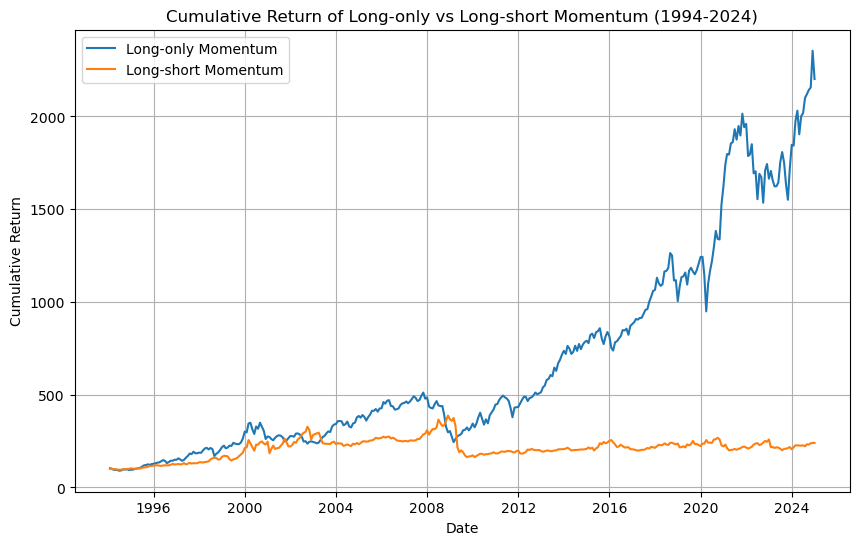

In [32]:
cumReturn_LO = Calc_CumulativeReturn(longOnly_Mom.loc["1994":"2024"])
cumReturn_LS = Calc_CumulativeReturn(ff["UMD"].loc["1994":"2024"])

plt.figure(figsize = (10,6))
plt.plot(cumReturn_LO.index, cumReturn_LO, label = "Long-only Momentum")
plt.plot(cumReturn_LS.index, cumReturn_LS, label = "Long-short Momentum")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title("Cumulative Return of Long-only vs Long-short Momentum (1994-2024)")
plt.legend()
plt.grid()
plt.show()

---

### 2.3

Is Momentum Just Data Mining, or is it a Robust Strategy?

Assess how sensitive the threshold for “winners” and “losers” is in the results.  
Compare three constructions:

- Long the top 1 decile, short the bottom 1 decile:

$$
\tilde{r}^{\text{momD1}} = r^{\text{mom}(10)} - r^{\text{mom}(1)}
$$

- Long the top 3 deciles, short the bottom 3 deciles:

$$
\tilde{r}^{\text{momD3}} = \frac{1}{3}\sum_{k=8}^{10} r^{\text{mom}(k)} - \frac{1}{3}\sum_{k=1}^{3} r^{\text{mom}(k)}
$$

- Long the top 5 deciles, short the bottom 5 deciles:

$$
\tilde{r}^{\text{momD5}} = \frac{1}{5}\sum_{k=6}^{10} r^{\text{mom}(k)} - \frac{1}{5}\sum_{k=1}^{5} r^{\text{mom}(k)}
$$

#### (a)
Compare all three constructions in the full-sample period (1994–2024) by filling out the table below.

| 1994–2024 | mean | vol | Sharpe | skewness | corr. to $\tilde{r}^m$ | corr. to $\tilde{r}^v$ |
|:----------:|:----:|:---:|:-------:|:----------:|:---------------------:|:---------------------:|
| $\tilde{r}^{\text{momD1}}$ | | | | | | |
| $\tilde{r}^{\text{momD3}}$ | | | | | | |
| $\tilde{r}^{\text{momD5}}$ | | | | | | |

In [40]:
momD1 = deciles["Hi PRIOR"] - deciles["Lo PRIOR"]
momD3 = (deciles["PRIOR 8"] + deciles["PRIOR 9"] + deciles["Hi PRIOR"])/3 - (deciles["Lo PRIOR"] + deciles["PRIOR 2"] + deciles["PRIOR 3"])/3
momD5 = (deciles["PRIOR 6"] + deciles["PRIOR 7"] + deciles["PRIOR 8"] + deciles["PRIOR 9"] + deciles["Hi PRIOR"])/5 - (deciles["Lo PRIOR"] + deciles["PRIOR 2"] + deciles["PRIOR 3"] + deciles["PRIOR 4"] + deciles["PRIOR 5"])/5

momD1 = momD1.loc["1994":]
momD3 = momD3.loc["1994":]
momD5 = momD5.loc["1994":]

mom_variants = [momD1, momD3, momD5]
mean_list, std_list, sharpe_list, skew_list, corr_M_list, corr_V_list = list(), list(), list(), list(), list(), list()

for mom in mom_variants:
    mean, std, sharpe = Calc_MeanStdSharpe_Stock(mom, annualized_factor)
    skew, _ = Calc_SkewKurt(mom)
    corr_M = mom.corr(ff["MKT"].loc["1994":])
    corr_V = mom.corr(ff["HML"].loc["1994":])
    mean_list.append(mean)
    std_list.append(std)
    sharpe_list.append(sharpe)
    skew_list.append(skew)
    corr_M_list.append(corr_M)
    corr_V_list.append(corr_V)

mean_umd, std_umd, sharpe_umd = Calc_MeanStdSharpe_Stock(ff["UMD"].loc["1994":], annualized_factor)
skew_umd, _ = Calc_SkewKurt(ff["UMD"].loc["1994":])
corr_M_umd = ff["UMD"].loc["1994":].corr(ff["MKT"].loc["1994":])
corr_V_umd = ff["UMD"].loc["1994":].corr(ff["HML"].loc["1994":])

mean_list.append(mean_umd)
std_list.append(std_umd)
sharpe_list.append(sharpe_umd)
skew_list.append(skew_umd)
corr_M_list.append(corr_M_umd)
corr_V_list.append(corr_V_umd)

result3 = pd.DataFrame({
    "Mean": mean_list,
    "Std": std_list,
    "Sharpe": sharpe_list,
    "Skewness": skew_list,
    "Corr with Market": corr_M_list,
    "Corr with Value": corr_V_list
}, index = ["momD1", "momD3", "momD5", "UMD"])
result3

,Mean,Std,Sharpe,Skewness,Corr with Market,Corr with Value
momD1,0.074195,0.298661,0.248425,-1.271370,-0.320216,-0.245515
momD3,0.026747,0.193075,0.138534,-1.319554,-0.354271,-0.220957
momD5,0.015525,0.133542,0.116254,-1.407710,-0.348999,-0.214293
UMD,0.041315,0.166054,0.248803,-1.451926,-0.305551,-0.215138



#### (b)
Do the tradeoffs between the 1-, 3-, and 5-decile constructions line up with the theoretical tradeoffs discussed in lecture?

- Yes, we can see long-short portfolio with higher threshold of decile has higher return, but also higher volatility.

#### (c)
Should AQR’s retail product consider using a 1-decile or 5-decile construction?

- They all have negative correlation with market and value factors, so from diversification perspective, all are good choices. However, 1-decile construction has highest Sharpe ratio among the three, so it would be the best choice for AQR's retail product.

#### (d)
Does $\tilde{r}_{\text{momD3}}$ have similar statistics to the Fama–French construction in (1)?   Recall that construction is also a 3-decile long–short construction but segmented by size. Compare the middle row of Table 3 with the top row of Table 2.

- They are similar, but Fama-French construction has higher return and lower volatility, resulting with higher sharpe ratio. Fama-French construction allows balance between small and large stocks, whereas top 3 deciles construction could be biased towards either small or large stocks.

---

### 2.4

Does implementing momentum require trading lots of small stocks– thus causing even larger trading costs?

For regulatory and liquidity reasons, AQR is particularly interested in using larger stocks for their momentum baskets. (Though they will launch one product that focuses on medium-sized stocks.)

Use the data provided on small-stock “winners” ($r^{\text{momSU}}$) and small-stock “losers” ($r^{\text{momSD}}$) to construct a small-stock momentum portfolio,

$$
r_t^{\text{momS}} = r_t^{\text{momSU}} - r_t^{\text{momSD}}
$$

Similarly, use the data provided to construct a big-stock momentum portfolio,

$$
r_t^{\text{momB}} = r_t^{\text{momBU}} - r_t^{\text{momBD}}
$$

#### (a)
Fill out Table 4 over the sample 1994–2024.

| 1994–2024 | mean | vol | Sharpe | skewness | corr. to $\tilde{r}^m$ |
|:----------:|:----:|:---:|:-------:|:----------:|:---------------------:|
| All stocks ($\tilde{r}^{\text{mom:FF}}$) | | | | | |
| Small stocks ($r_t^{\text{momS}}$) | | | | | |
| Large stocks ($r_t^{\text{momB}}$) | | | | | |

In [46]:
momS = size["SMALL HiPRIOR"] - size["SMALL LoPRIOR"]
momB = size["BIG HiPRIOR"] - size["BIG LoPRIOR"]

mom_names = [momS.loc["1994":], momB.loc["1994":]]
mean_SB, std_SB, sharpe_SB, skew_SB, corr_M_SB = list(), list(), list(), list(), list()

mean_mom, std_mom, sharpe_mom = Calc_MeanStdSharpe_Stock(ff["UMD"].loc["1994":], annualized_factor)
skew_mom, _ = Calc_SkewKurt(ff["UMD"].loc["1994":])
corr_M_mom = mom.corr(ff["MKT"].loc["1994":])

mean_SB.append(mean_mom)
std_SB.append(std_mom)
sharpe_SB.append(sharpe_mom)
skew_SB.append(skew_mom)
corr_M_SB.append(corr_M_mom)

for mom in mom_names:
    mean, std, sharpe = Calc_MeanStdSharpe_Stock(mom, annualized_factor)
    skew, _ = Calc_SkewKurt(mom)
    corr_M = mom.corr(ff["MKT"].loc["1994"])
    mean_SB.append(mean)
    std_SB.append(std)
    sharpe_SB.append(sharpe)
    skew_SB.append(skew)
    corr_M_SB.append(corr_M)
    
result4 = pd.DataFrame({
    "Mean": mean_SB,
    "Std": std_SB,
    "Sharpe": sharpe_SB,
    "Skewness": skew_SB,
    "Corr with Market": corr_M_SB
}, index = ["UMD", "Small Stocks", "Big Stocks"])
result4

,Mean,Std,Sharpe,Skewness,Corr with Market
UMD,0.041315,0.166054,0.248803,-1.451926,-0.272719
Small Stocks,0.061797,0.167692,0.368514,-1.813338,0.251829
Big Stocks,0.020773,0.181850,0.114229,-0.855287,0.464028


#### (b)
Is the attractiveness of momentum mostly driven by small stocks?  
Does a large-stock momentum strategy still deliver excess returns at comparable risk?

- Yes, the small stock momentum portfolio has almost 3 time higher sharpe ratio than the large stock momentum portfolio. Also, the small stock has lower correlation with market factor compared to large stock momentum portfolio.

---

### 2.5 Conclusion

What is your assessment of the AQR retail product?  
Is it capturing the important features of the Fama–French momentum construction?  
Would you suggest any modifications?

- AQR’s retail product uses a long only approach which leads to a higher correlation with the Market and has less diversification benefits compared to the benchmark index or Fama-French momentum factor.

- Quarterly rebalancing might make the portfolio diverge from the benchmark index and Fama-French momentum factor.